# Programmation d'un NEURONE ARTIFICIEL - Deep Learning - Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Génération d'un Dataset

In [2]:
X,y = make_blobs(n_samples = 100 , n_features= 2, centers = 2 , random_state = 0 )
y = y.reshape((y.shape[0], 1))

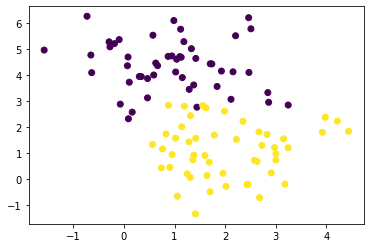

In [3]:
plt.scatter( X[ :,0], X[ :,1], c = y )

## Vectorisation et modèle 

Définition des paramètres :

In [4]:
def paramètres(X) : 
    W  = np.random.randn(X.shape[1], 1) 
    b = np.random.randn(1) 
    return (W, b) 

Définition du modèle :

In [5]:
def model(X, W, b) : 
    
    # Z : Frontière de décision 
    Z = X.dot(W) + b 
    
    # A : sigmoïde 
    A = 1 / (1 + np.exp(-Z)) 
    return A 

Définition de la fonction coût (Maximum de la log vraisemblence) :

In [6]:
def max_v(A, y) : 
    return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [7]:
W, b = paramètres(X)
A = model( X, W, b) 
max_v(A, y)

0.3992551849238188

## Gradients 

In [8]:
def grad( A, X, y) : 
    
    #dW : dérivée de la log vraisemblence par rapport aux parametres W 
    dW = 1 / len(y) * np.dot(X.T, A - y)
    
    #db : dérivée de la log vraisemblence par rapport au vecteur constante b
    db = 1 / len(y) * np.sum(A- y) 
    
    return (dW, db) 

Maximisation de la vraisemblence à partir de la descente du gradient :

In [9]:
def max(dW, db, W, b , alpha ) : 
    W = W - alpha * dW 
    b = b - alpha * db 
    return (W,b) 

## Fonction du modèle de neurone 

In [10]:
def neurone(X, y, alpha = 0.1, iteration = 100 ) : 
    
    # W et b aléatoire en premier lieu 
    W, b = paramètres(X) 
    vraisemblance = []
    
    # Maximum de vraisemblence 
    for i in range(iteration) : 
        
        A = model(X, W, b)
        vraisemblance.append(max_v(A, y)) # visualisation du gradient
        dW, db = grad(A, X, y)
        W, b = max(dW, db, W, b , alpha )
        plt.plot(vraisemblance) # descente du gradient
        
    return (W, b)

(array([[ 1.34140963],
        [-1.55169276]]),
 array([1.78562551]))

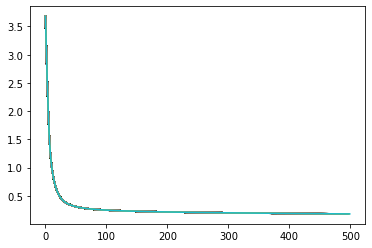

In [11]:
neurone(X, y, alpha = 0.1, iteration = 500 ) ## convergence vers 0 de la descente du Gradient

# Prédictions

In [12]:
def prediction( X, W, b) : 
    A = model(X,W,b) # A partir de la sigmoide
    print(A) # probabilité d'observation (vraisemblance)
    return A>= 0.5 # A< 0.5

Prédiction pour un individu donné du dataset : 

[0.1890936]


array([False])

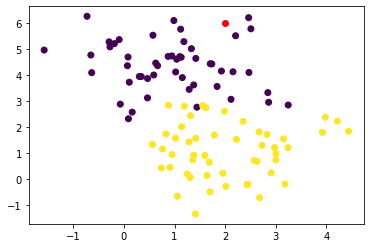

In [13]:
individu  = np.array([2, 6]) # Observation du dataset
plt.scatter( X[:,0], X[ :,1], c= y )  # dataset
plt.scatter(individu[0], individu[1] , c='r') # observation
prediction( individu, W, b) # prédiction du modele

Frontière de décision : 

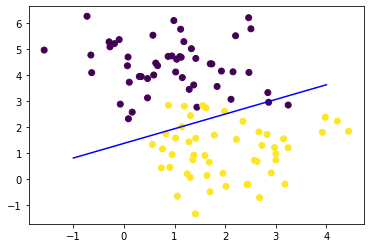

In [14]:
# dans cet exemple, la frontiere de décisions est une fct à deux variables

x1 = np.linspace(-1 , 4 , 100) 
x2 = (-W[0] * x1 - b) / W[1]
plt.scatter( X[:,0], X[ :,1], c= y )  # dataset
plt.plot(x1, x2, c ='blue' ) 